#### International Conference on Machine Learning (ICML), 2020.

## Discriminative Jackknife: Quantifying Uncertainty in Deep Learning via Influence Functions

*Ahmed M. Alaa and Mihaela van der Schaar*

Deep learning models achieve high predictive accuracy across a broad spectrum of tasks, but rigorously quantifying their predictive uncertainty remains challenging. Usable estimates of predictive uncertainty should (1) cover the true prediction targets with high probability, and (2) discriminate between high- and low-confidence prediction instances. The discriminative jackknife (DJ) is a frequentist procedure that utilizes *influence functions* of a model's loss functional to construct a jackknife (or leave-one-out) estimator of predictive confidence intervals. The DJ satisfies (1) and (2), is applicable to a wide range of deep learning models, is easy to implement, and can be applied in a post-hoc fashion without interfering with model training or compromising its accuracy. The current implementation of the DJ is limited to relatively small neural networks.

#### Step 1: Import all necessary libraries

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

from models.static import *
from utils.performance import * 

#### Step 2: Set all data and model parameters

In [3]:
n_epochs     = 1000                                         # number of epochs
n_dim        = 1                                            # number of features   
activtn      = "Tanh"                                       # tanh activation function
num_hidden   = 50                                           # number of hidden units
num_layers   = 1                                            # number of layers
verbosity    = False
learn_rate   = 0.1                                          # learning rate for gradient descent 

params       = dict({"n_dim":n_dim,                         # model parameters 
                     "activation":activtn, 
                     "num_hidden":num_hidden,
                     "num_layers":num_layers})

train_params = dict({"num_iter":n_epochs,                   # training algorithm parameters
                     "verbosity":verbosity, 
                     "learning_rate":learn_rate})

#### Step 3: Generate synthetic data

In [4]:
def true_func(X):
    
    return (X**3)

def sample_data(n_train=50, n_test=20, sigma=3):
    
    # NOTE: Choose one:
    X_train  = np.random.uniform(-2, 2, size=n_train).reshape((-1, 1))  
    X_train  = np.random.normal(0, 1, size=n_train).reshape((-1, 1)) 

    noise    = np.random.normal(0, sigma**2, size=n_train).reshape((-1, 1))

    Y_train  = true_func(X_train.reshape((-1, 1))) + noise
    
    X_test   = np.linspace(-6, 6, n_test).reshape((-1, 1))
    Y_test   = true_func(X_test).reshape((-1,)) 
    
    return X_train, Y_train, X_test, Y_test
    

In [5]:
X_train, Y_train, X_test, Y_test = sample_data(n_train=200, n_test=100, sigma=2)

#### Step 4: Instantiate and train a neural network model

In [6]:
DNN_model      = DNN(**params)
    
DNN_model.fit(X_train, Y_train)

#### Step 5: Post-hoc uncertainty computation

Our method computes uncertainty estimates in a post-hoc fashion. The function *DNN_uncertainty_wrapper* takes the trained DNN model as an input, and computes the influence functions per training point in order to evaluate confidence intervals on a new testing point. The object returned by *DNN_uncertainty_wrapper* is a super class containing the DNN object with extra attributes needed to computer confidence intervals on test data. 

In [7]:
DJ_model       = DNN_uncertainty_wrapper(DNN_model, order=1, damp=1e-2)

#### Step 6: Compute confidence intervals on testing data

In [8]:
y_pred, y_lower, y_upper = DJ_model.predict(X_test, coverage=.95)

(-20, 20)

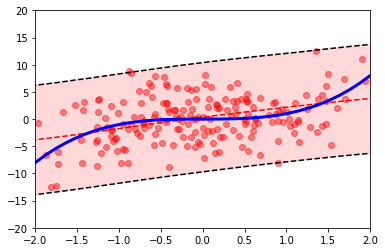

In [14]:
plt.plot(X_test, y_pred, color="r", linestyle="--")
plt.fill_between(X_test.reshape((-1,)), y_lower, y_upper, alpha=0.15, color="r", linestyle=":")
plt.plot(X_test, y_lower, linestyle="--", color="black")
plt.plot(X_test, y_upper, linestyle="--", color="black")

plt.plot(X_test, Y_test, linewidth=3, color="b")
plt.scatter(X_train, Y_train, alpha=0.45, color="r")

plt.xlim(-2, 2)
plt.ylim(-20, 20)

The experimental setup for generating the illustrative samples in Figure 3 are saved in *saved_models/DJ_Experiment_1_results*